### Import Dependencies and Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import int_dash_data_functions as funcs

In [2]:
cpi_df = funcs.format_cpi_data(funcs.get_cpi_data())
gdp_df = funcs.format_gdp_data(funcs.get_gdp_data())
mortgage_df = funcs.format_mortgage_data(funcs.get_mortgage_data())
interest_df = funcs.format_interest_data(funcs.get_interest_data())
ukhpi_df = funcs.format_ukhpi_data(funcs.get_ukhpi_data())
avg_price_df = funcs.format_avg_price_data(funcs.get_avg_price_data())

In [3]:
all_dfs = [cpi_df, gdp_df, mortgage_df, interest_df, ukhpi_df, avg_price_df]
df = funcs.stitch_all_data(all_dfs)

In [4]:
df.head()

,Housing Associated Costs,Overall Index,Housing Associated Costs Inflation Rate,Overall Inflation Rate,Monthly GDP,Mortgage Approvals,Base Interest Rate,UKHPI England,UKHPI Northern Ireland,UKHPI Scotland,...,UKHPI England % Change,UKHPI Northern Ireland % Change,UKHPI Scotland % Change,UKHPI Wales % Change,UKHPI United Kingdom % Change,Average Property Price England,Average Property Price Northern Ireland,Average Property Price Scotland,Average Property Price Wales,Average Property Price United Kingdom
Date,,,,,,,,,,,,,,,,,,,,,
1997-01-01,63.5,69.2,0.001577,-0.002882,63.3398,72978.0,5.9375,27.501591,46.949854,32.187747,...,0.000596,0.039735,-0.018779,-0.008151,0.006769,55788.50251,52086.16563,43439.14962,43524.95351,48709.692817
1997-02-01,63.6,69.3,0.001575,0.001445,63.9959,72980.0,5.9375,27.704075,46.949854,32.187747,...,0.007363,0.000000,0.000000,0.025432,0.007326,56199.25087,52086.16563,43439.14962,44631.86395,49089.107518
1997-03-01,63.6,69.4,0.000000,0.001443,64.0355,84044.0,5.9375,27.992467,46.949854,32.187747,...,0.010410,0.000000,0.000000,-0.001807,0.001641,56784.27139,52086.16563,43439.14962,44551.19667,49215.195827
1997-04-01,64.1,69.7,0.007862,0.004323,64.6273,101195.0,5.9375,28.383387,44.424597,34.066649,...,0.013965,-0.053786,0.058373,-0.007601,-0.003605,57577.27313,49284.64504,45974.83204,44212.55854,49262.327187
1997-05-01,64.4,70.0,0.004680,0.004304,64.1371,117383.0,5.9375,28.837231,44.424597,34.066649,...,0.015990,0.000000,0.000000,0.027846,0.009746,58497.92049,49284.64504,45974.83204,45443.71838,49800.278988


### Explore visualisations and correlation

Looking at effect of overall inflation, housing associated costs inflation, monthly GDP, mortgage approvals and BoE base rate on house price index and average property price

<Axes: >

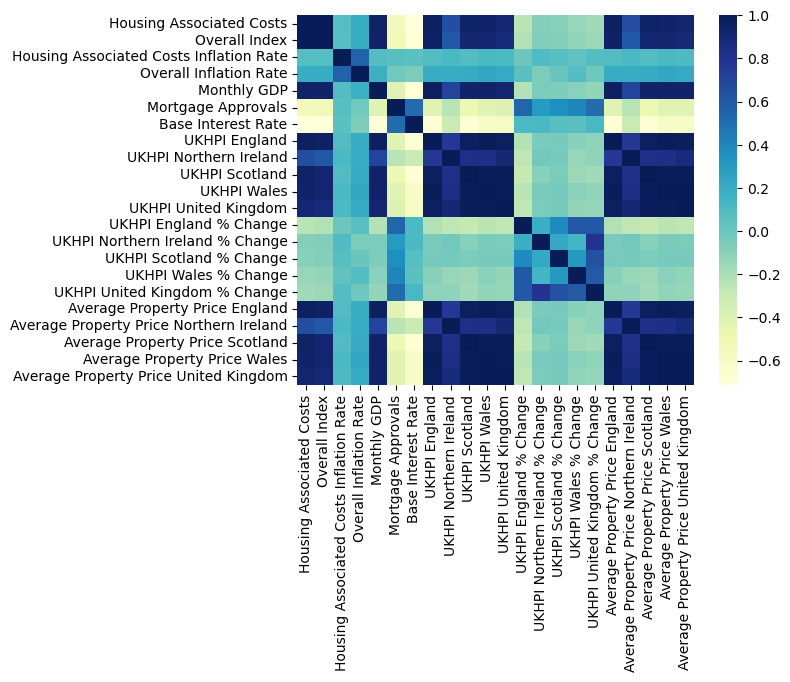

In [7]:
sns.heatmap(df.corr(), cmap="YlGnBu") 

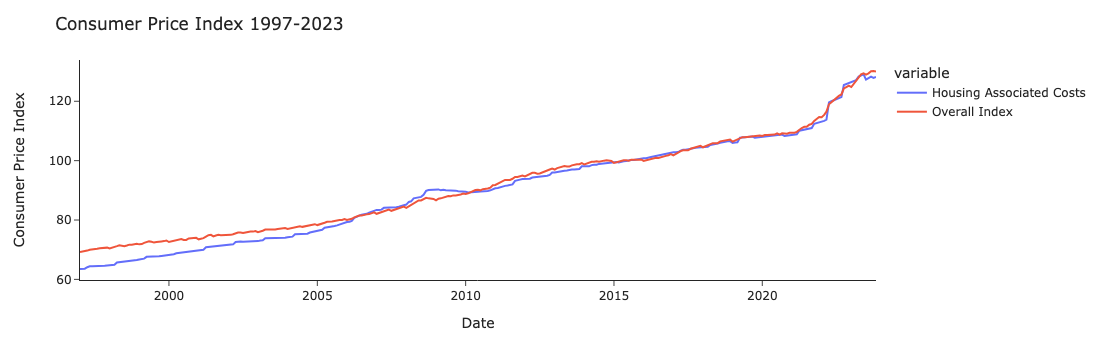

In [16]:
fig = px.line(df, x=df.index, y=['Housing Associated Costs', 'Overall Index'])
fig.update_layout(template='simple_white',
    yaxis_title='Consumer Price Index',
    title='Consumer Price Index ',
)
fig.show()

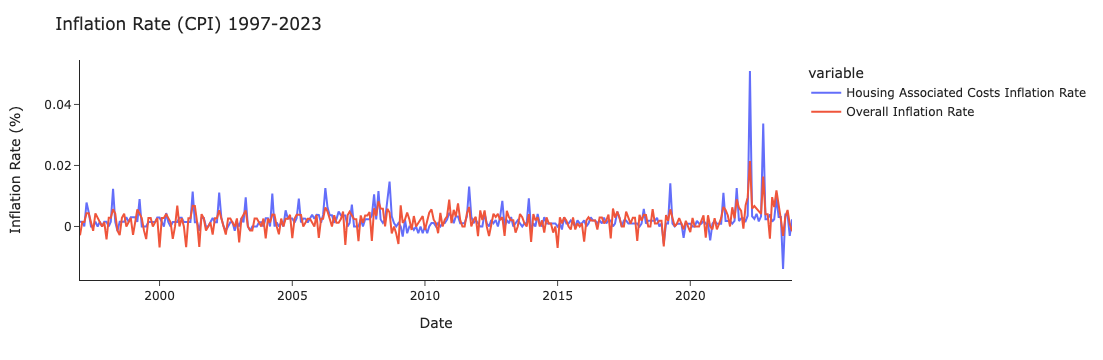

In [27]:
fig = px.line(df, x=df.index, y=['Housing Associated Costs Inflation Rate', 'Overall Inflation Rate'])
fig.update_layout(template='simple_white',
    yaxis_title='Inflation Rate (%)',
    title='Inflation Rate (CPI) ',
)
fig.show()

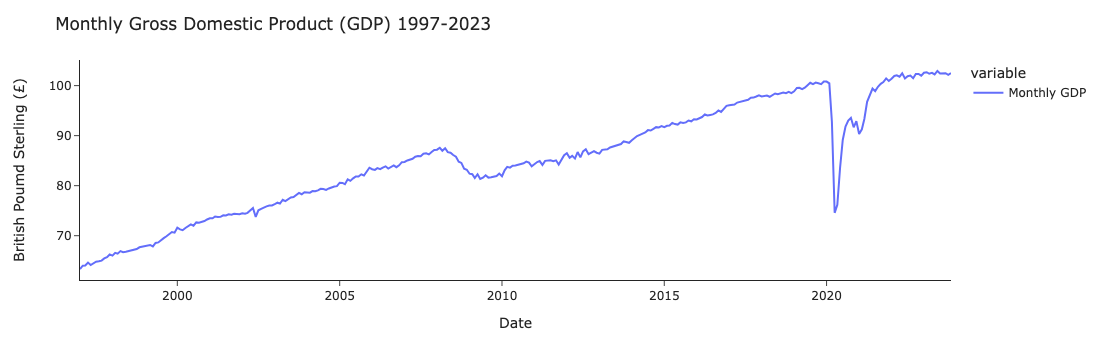

In [26]:
fig = px.line(df, x=df.index, y=['Monthly GDP'])
fig.update_layout(template='simple_white',
    yaxis_title='British Poumd Sterling (£)',
    title='Monthly Gross Domestic Product (GDP) ',
)
fig.show()

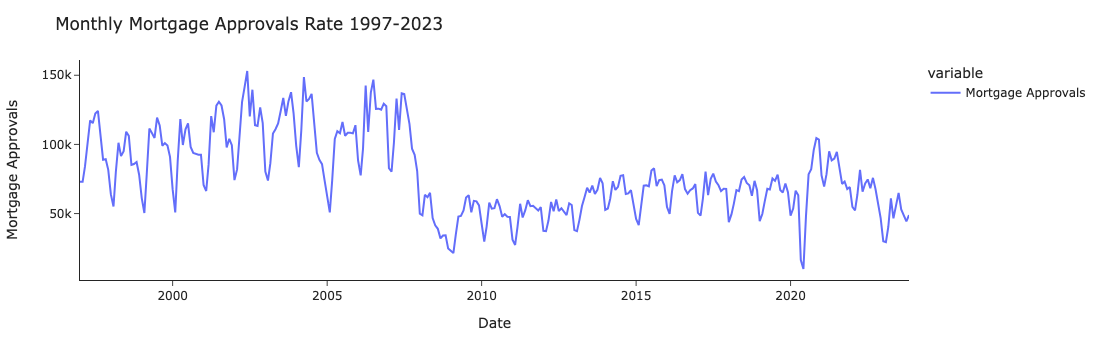

In [20]:
fig = px.line(df, x=df.index, y=['Mortgage Approvals'])
fig.update_layout(template='simple_white',
    yaxis_title='Mortgage Approvals',
    title='Monthly Mortgage Approvals Rate ',
)
fig.show()

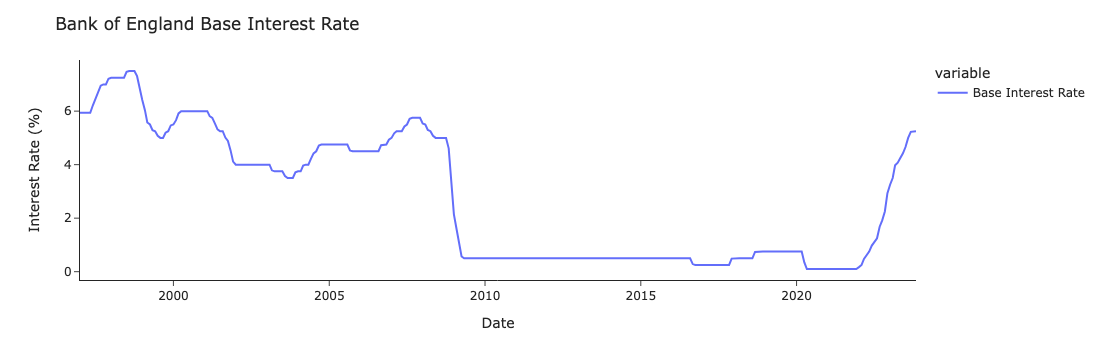

In [32]:
fig = px.line(df, x=df.index, y=['Base Interest Rate'])
fig.update_layout(template='simple_white',
    yaxis_title='Interest Rate (%)',
    title='Bank of England Base Interest Rate',
)
fig.show()

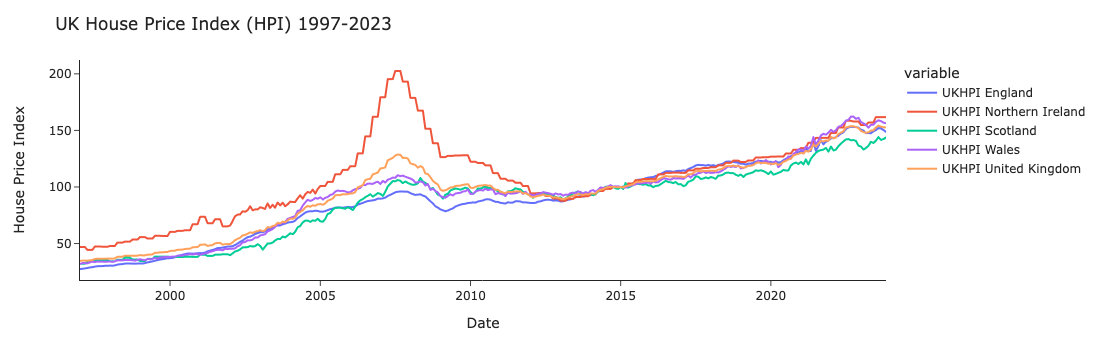

In [29]:
fig = px.line(df, x=df.index, y=[x for x in df.columns if 'UKHPI' in x and '%' not in x])
fig.update_layout(template='simple_white',
    yaxis_title='House Price Index',
    title='UK House Price Index (HPI) ',
)
fig.show()

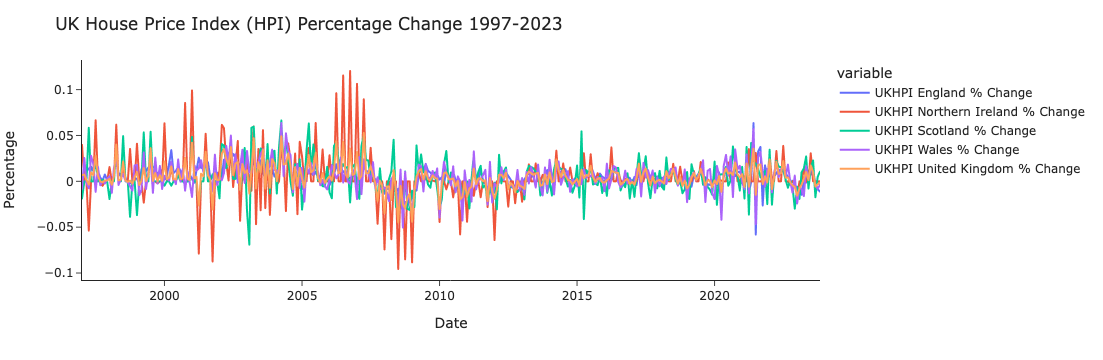

In [24]:
fig = px.line(df, x=df.index, y=[x for x in df.columns if '%' in x])
fig.update_layout(template='simple_white',
    yaxis_title='Percentage',
    title='UK House Price Index (HPI) Percentage Change',
)
fig.show()

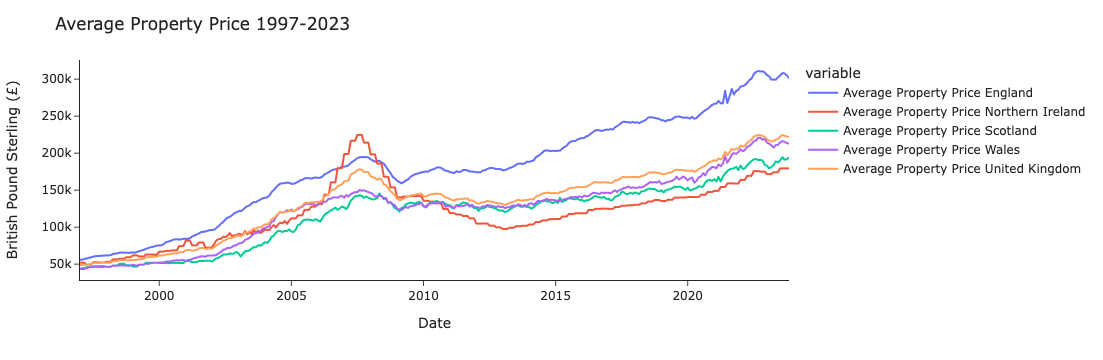

In [25]:
fig = px.line(df, x=df.index, y=[x for x in df.columns if 'Average' in x])
fig.update_layout(template='simple_white',
    yaxis_title='British Pound Sterling (£)',
    title='Average Property Price',
)
fig.show()

In [51]:
interest_df.iloc[-1]

Base Interest Rate    5.25
Name: 2024-02-01 00:00:00, dtype: float64